In [1]:
%matplotlib inline
import pandas as pd
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

import players
player_names = list(map(str, players.players))

turns = 200
number_of_players = len(player_names)

def clean_latex(string):
    """Replace some special carachters"""
    string = string.replace("textbackslashpi", "pi")
    string = string.replace("textbackslashphi", "phi")
    string = string.replace("\\$", "$")
    string = string.replace("\\$", "$")
    string = string.replace("\\textasciicircum", "^")
    string = string.replace("\_", "_")
    string = string.replace("2_2_2", "2\_2\_2")
    string = string.replace("1_1_1", "1\_1\_1")
    return string

# Study the standard tournaments

## Scores

In [2]:
def read_scores(files):
    dfs = []
    for gz in files:
        if "scores" in gz:
            dfs.append(pd.read_csv(gz, header=None, names=player_names))
    df = pd.concat(dfs)
    df /= turns * (number_of_players - 1)  # Scale all scores
    return df

In [3]:
standard_files = glob.glob("./data/*_0_1000*gz")
scores = read_scores(files=standard_files)

In [4]:
scores_summary = scores.describe(percentiles=[0.05, .25, .5, .75, .95]).transpose()
scores_summary = scores_summary.sort_values("50%", ascending=False)  # Sorted on the median
scores_summary.head(15)

,count,mean,std,min,5%,25%,50%,75%,95%,max
EvolvedLookerUp2_2_2,15000.0,2.954937,0.010394,2.915457,2.936941,2.948000,2.955514,2.962571,2.970943,2.984286
Evolved HMM 5,15000.0,2.954333,0.013890,2.903257,2.931284,2.944707,2.954357,2.964057,2.976829,3.002743
Evolved FSM 16,15000.0,2.952436,0.013192,2.900371,2.929656,2.943543,2.953086,2.961943,2.973057,2.993171
PSO Gambler 2_2_2,15000.0,2.938380,0.013361,2.885514,2.913314,2.929857,2.940257,2.948400,2.957200,2.971343
Evolved FSM 16 Noise 05,15000.0,2.918978,0.012610,2.874286,2.898083,2.910429,2.919014,2.927600,2.939629,2.960943
PSO Gambler 1_1_1,15000.0,2.911675,0.023403,2.809600,2.872971,2.895943,2.912086,2.927457,2.950057,3.011857
Evolved ANN 5,15000.0,2.911783,0.010177,2.872743,2.894400,2.904829,2.912057,2.919314,2.927771,2.944114
Evolved FSM 4,15000.0,2.909684,0.012060,2.868343,2.889314,2.901229,2.910229,2.918521,2.928516,2.941857
Evolved ANN,15000.0,2.907322,0.010036,2.865457,2.890600,2.900514,2.907543,2.914486,2.923457,2.941629
PSO Gambler Mem1,15000.0,2.901336,0.025270,2.794314,2.858741,2.884343,2.901771,2.918771,2.942314,2.983543


In [5]:
# Write the top 15 players to a tex table
with open("../assets/standard_top_15_scores_summary.tex", "w") as f:
    f.write(clean_latex(scores_summary.head(15).round(2).to_latex()))

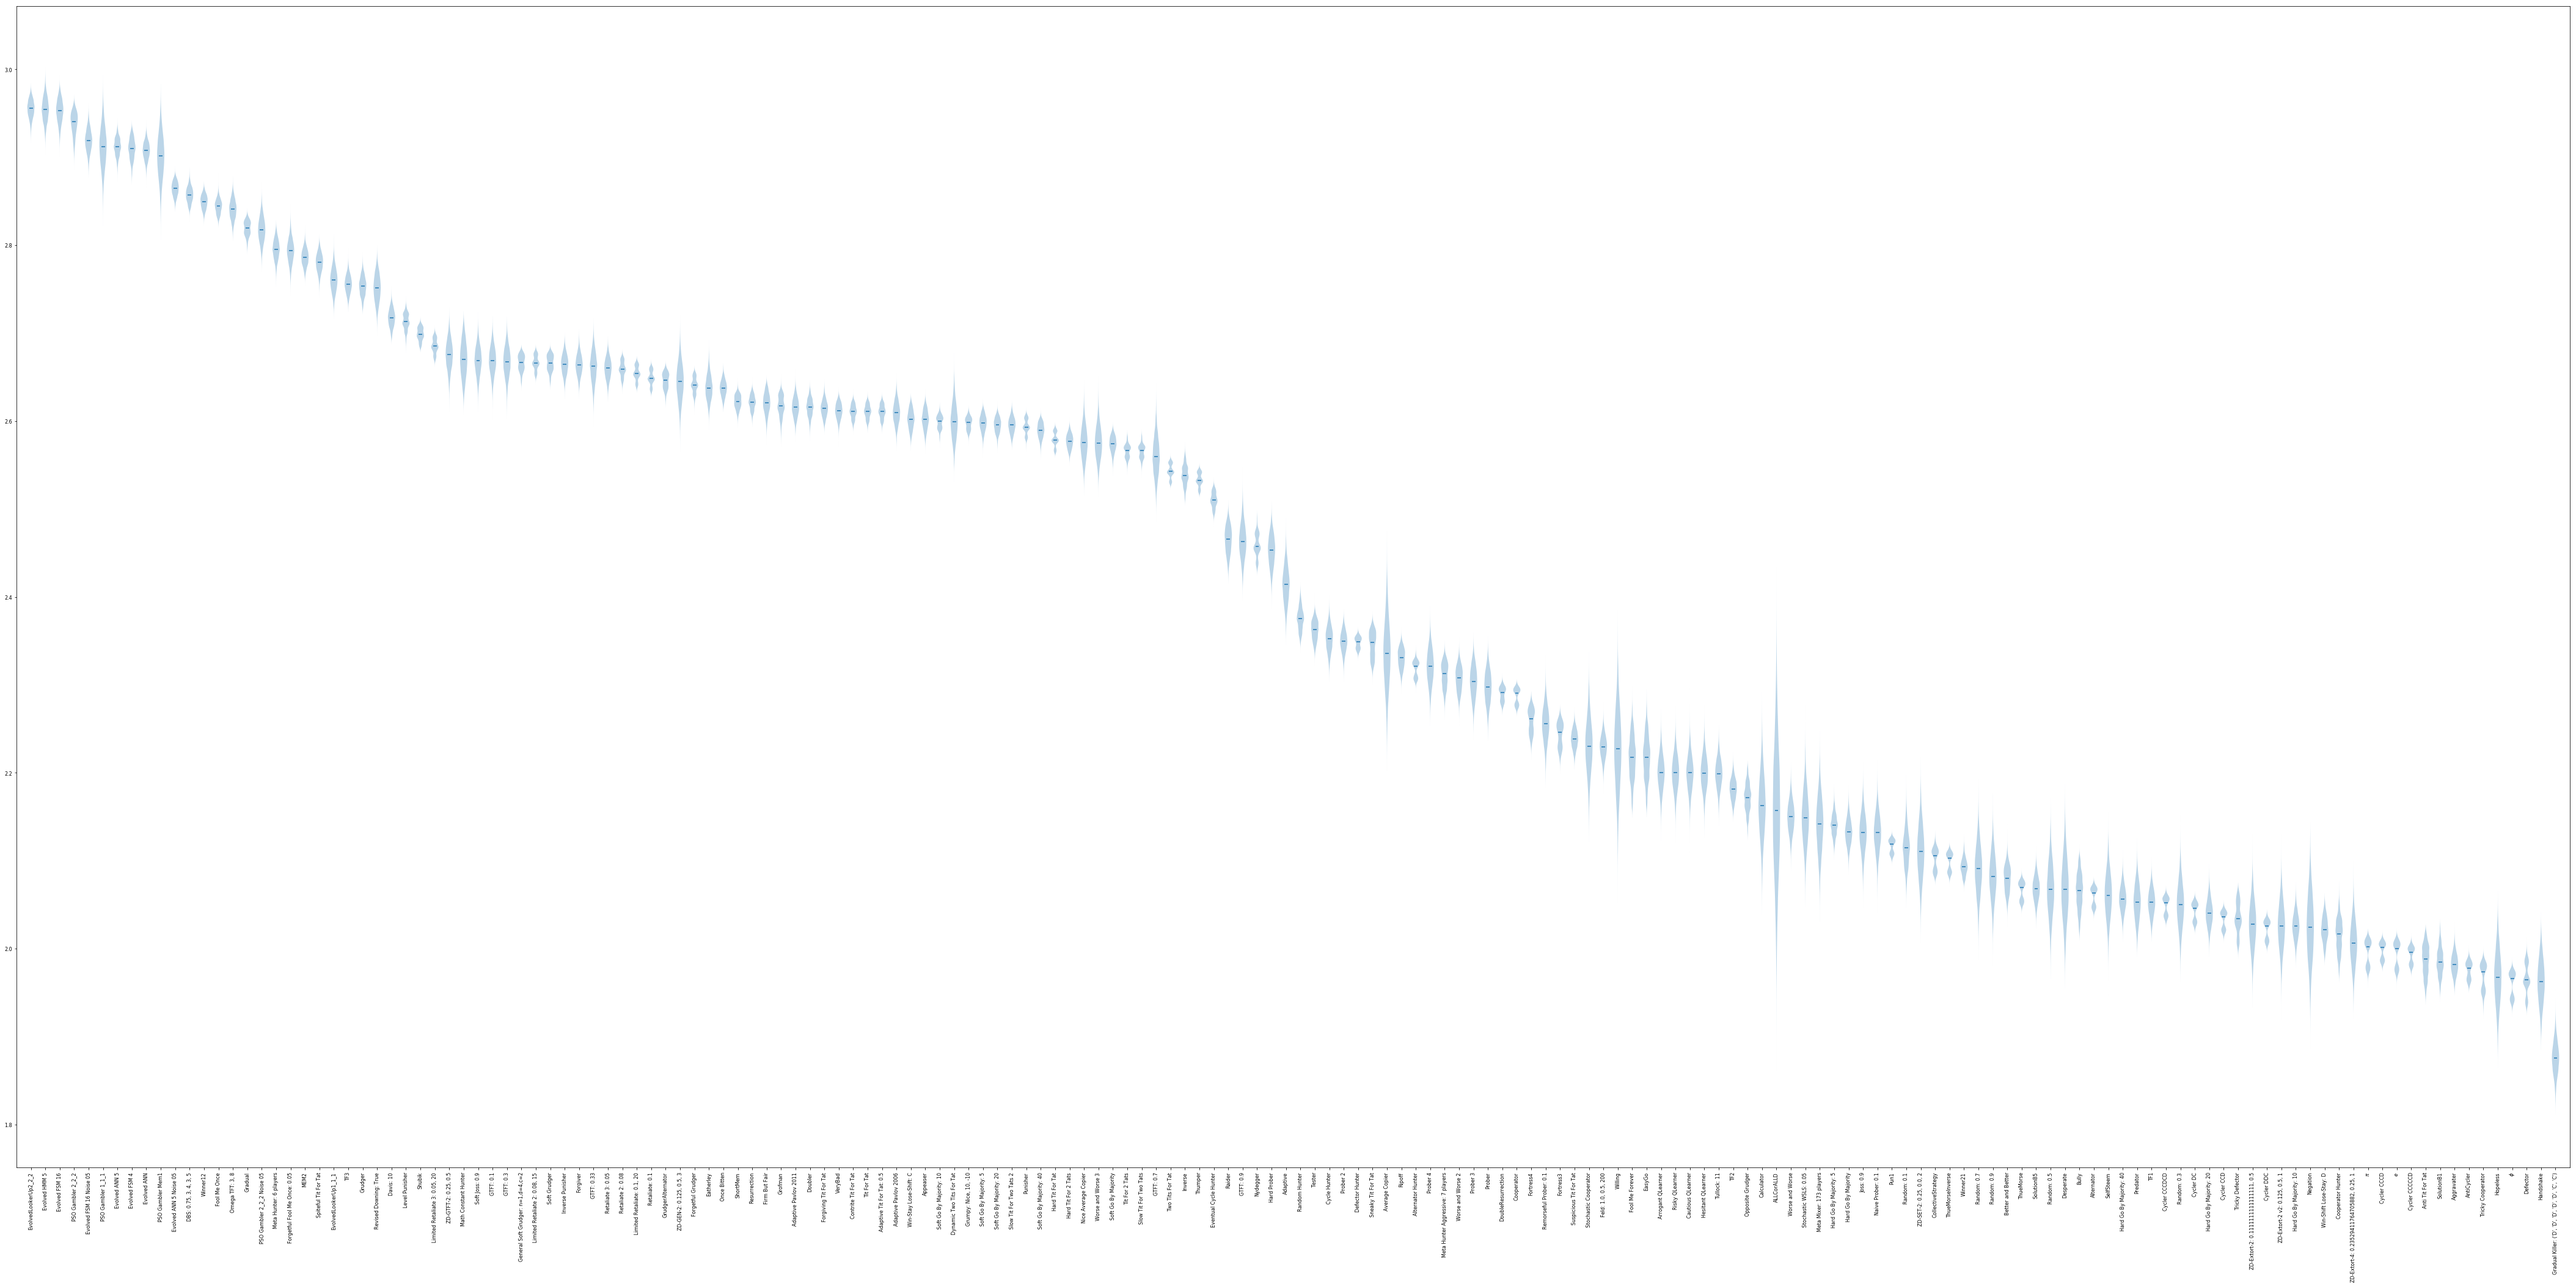

In [6]:
fig, ax = plt.subplots()
width = number_of_players / 3
height = width / 2 
spacing = 4 
positions = spacing * np.arange(1, number_of_players + 1, 1)
fig.set_size_inches(width, height) 

ax.violinplot([scores[player] for player in scores_summary.index],
              positions=positions, widths=spacing / 2,
              showmedians=True, showextrema=False)
ax.set_xticks(positions) 
ax.set_xticklabels(scores_summary.index, rotation=90)
ax.set_xlim([0, spacing * (number_of_players + 1)])
ax.tick_params(axis='both', which='both', labelsize=8)
fig.tight_layout()
fig.savefig("../assets/standard_scores_boxplots.pdf");

## Ranks

Every row corresponds to a tournament. We can see the ranks of each strategy across the tournament repetitions.

In [7]:
summary_ranks = scores.rank(axis=1, ascending=False).describe(percentiles=[0.05, .25, .5, .75, .95]).transpose()
summary_ranks = summary_ranks.sort_values("mean")
summary_ranks.head(15)

,count,mean,std,min,5%,25%,50%,75%,95%,max
EvolvedLookerUp2_2_2,15000.0,2.180700,1.067914,1.0,1.0,1.0,2.0,3.0,4.0,7.0
Evolved HMM 5,15000.0,2.323400,1.271739,1.0,1.0,1.0,2.0,3.0,5.0,9.0
Evolved FSM 16,15000.0,2.472500,1.296690,1.0,1.0,1.0,2.0,3.0,5.0,9.0
PSO Gambler 2_2_2,15000.0,3.969100,1.538176,1.0,2.0,3.0,4.0,5.0,7.0,10.0
Evolved FSM 16 Noise 05,15000.0,6.301300,1.698301,1.0,4.0,5.0,6.0,7.0,9.0,11.0
PSO Gambler 1_1_1,15000.0,7.117900,2.502006,1.0,3.0,5.0,7.0,9.0,10.0,16.0
Evolved ANN 5,15000.0,7.278200,1.524793,2.0,5.0,6.0,7.0,8.0,10.0,11.0
Evolved FSM 4,15000.0,7.521033,1.628399,2.0,5.0,6.0,8.0,9.0,10.0,12.0
Evolved ANN,15000.0,7.890367,1.464652,2.0,5.0,7.0,8.0,9.0,10.0,12.0
PSO Gambler Mem1,15000.0,8.209800,2.525802,1.0,4.0,6.0,9.0,10.0,12.0,18.0


In [8]:
# Write the top 15 players to a tex table
with open("../assets/standard_top_15_ranks_summary.tex", "w") as f:
    f.write(clean_latex(summary_ranks.head(15).round(2).to_latex()))

## Payoff matrix

As all the individual payoff matrix files have the mean values and they all have the same number of repetitions, the mean of the means is the mean over all tournaments.

In [9]:
def read_payoff_matrix(files):
    arrays = []
    for gz in files:
        if "payoff_matrix" in gz:
            arrays.append(np.array(pd.read_csv(gz, header=None)))  # Read through pd to deal with float conversion
    return sum(arrays) / len(arrays)

In [10]:
payoff_matrix = read_payoff_matrix(files=standard_files)
payoff_matrix.shape

(176, 176)

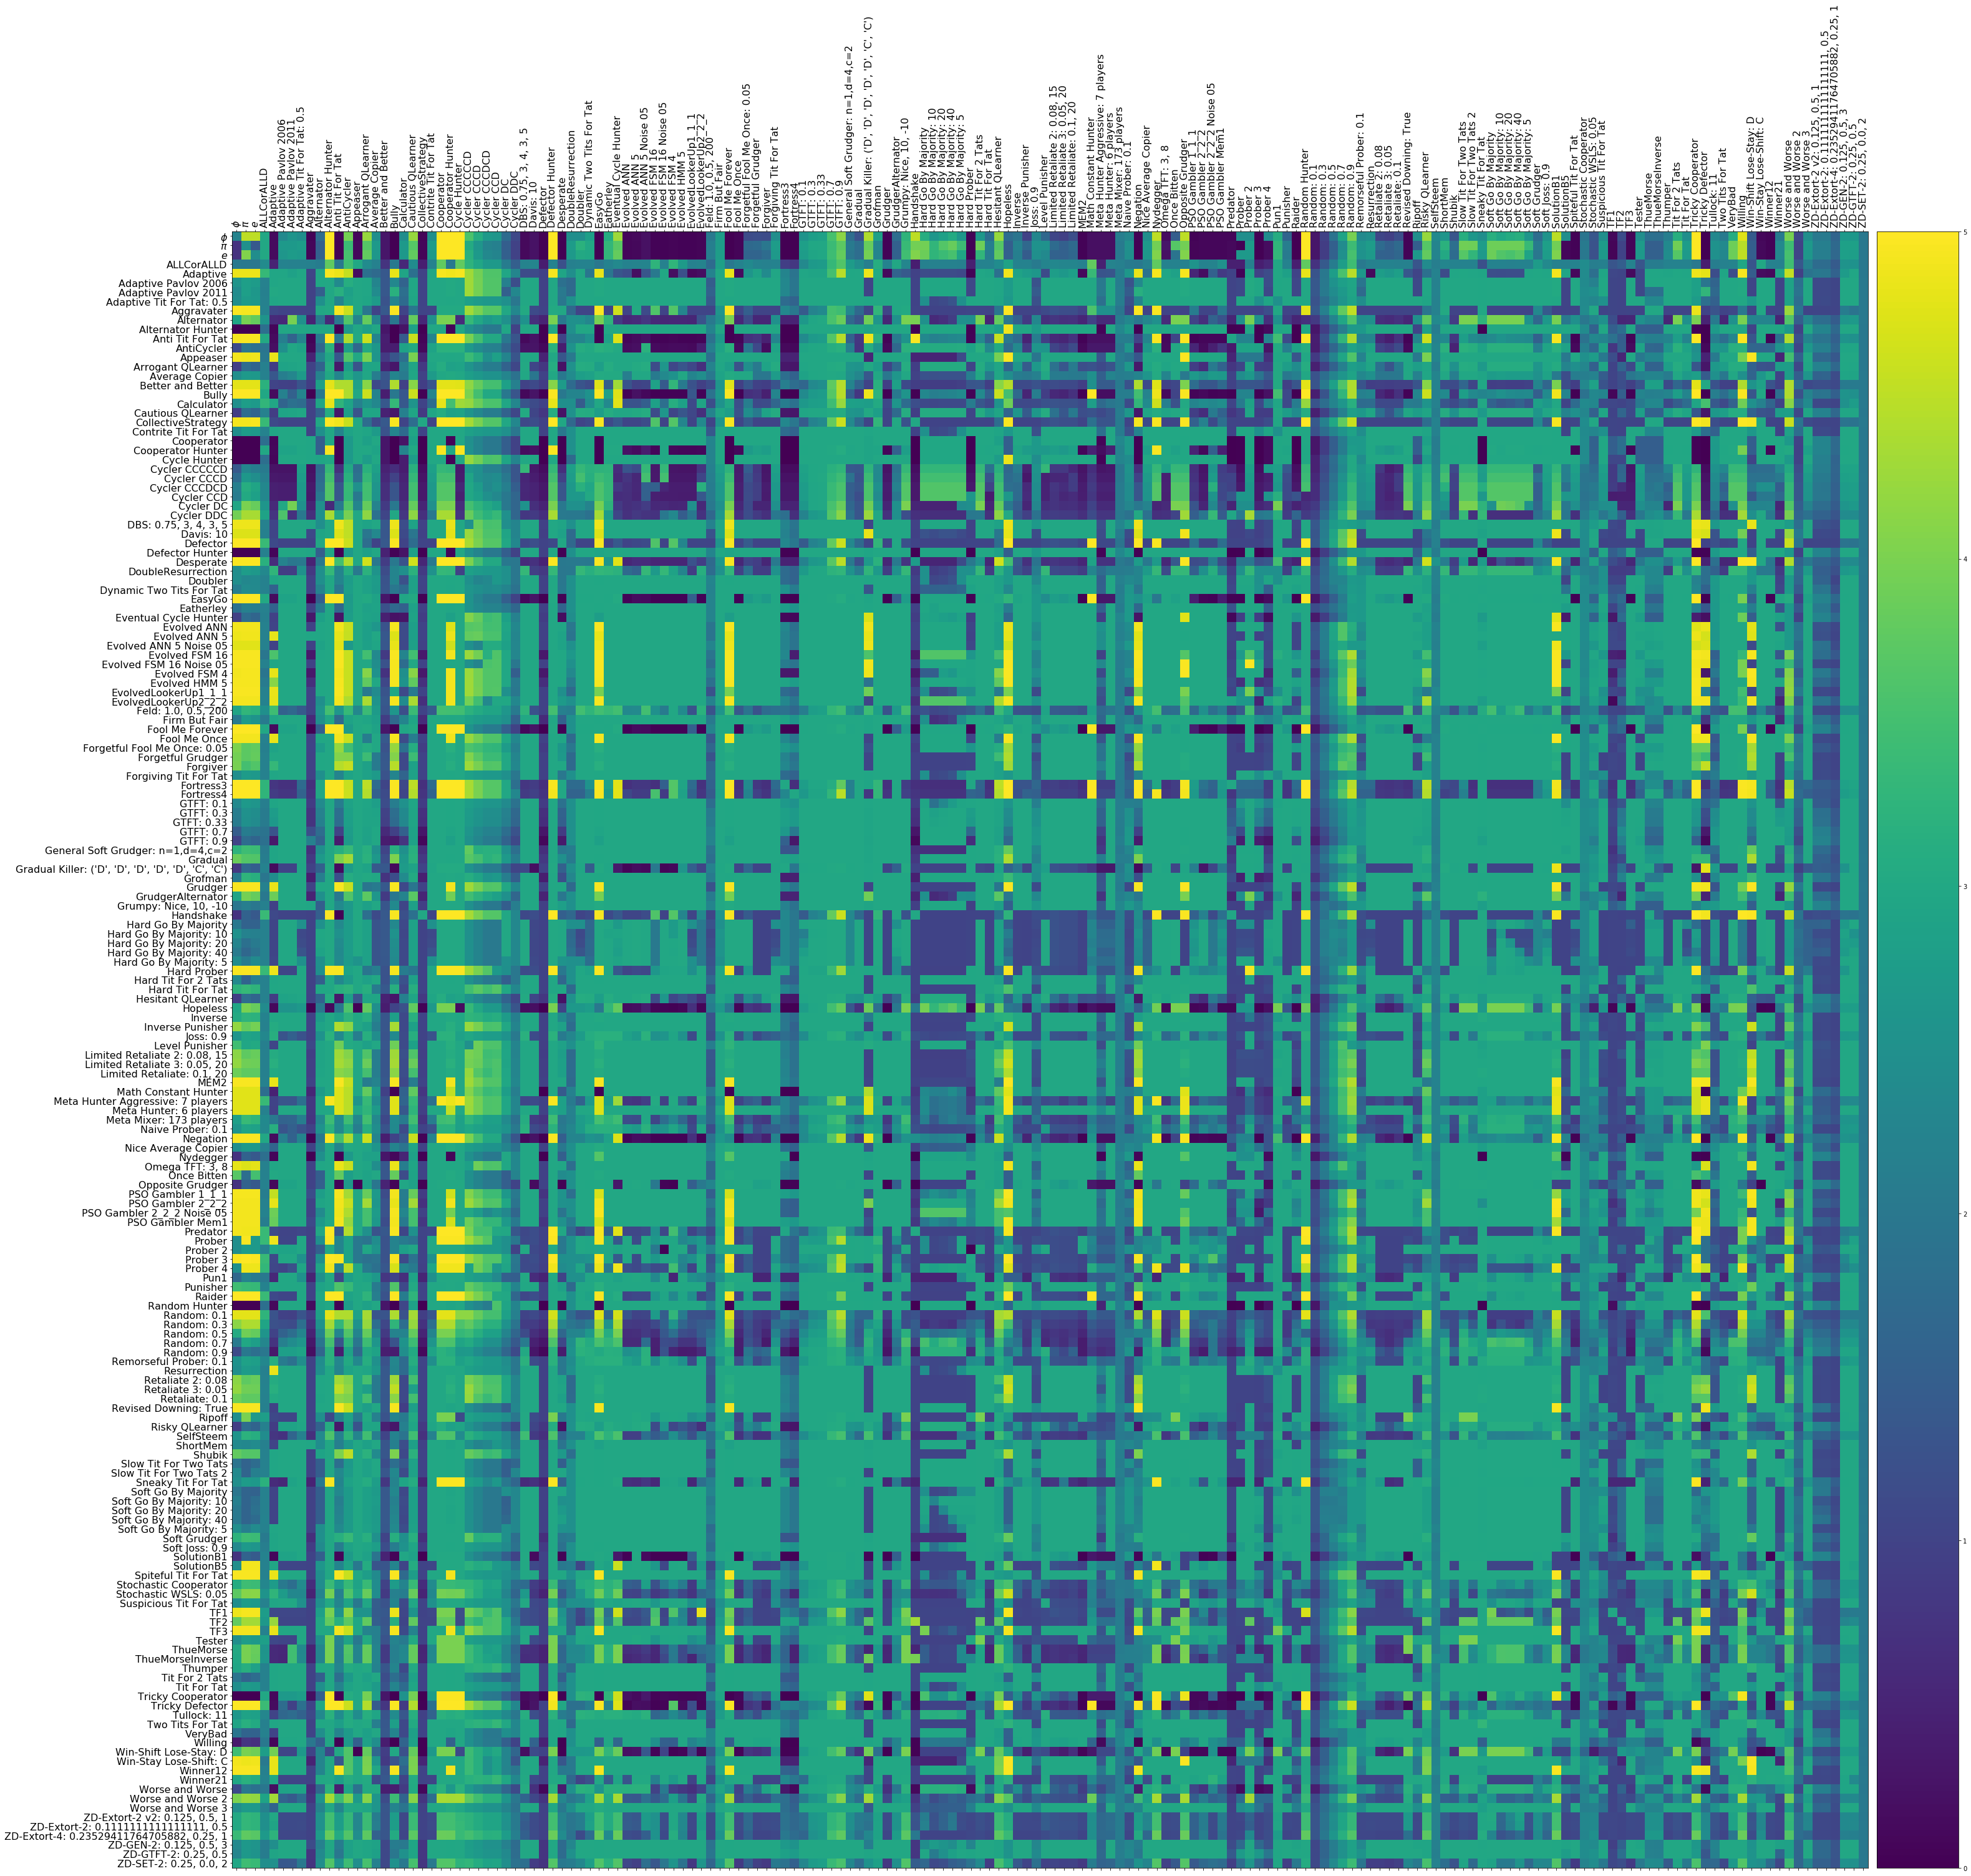

In [11]:
fig, ax = plt.subplots()
width = number_of_players / 4
height = width
spacing = 4 
fig.set_size_inches(width, height) 

mat = ax.matshow(payoff_matrix)

ax.set_xticks(range(number_of_players))
ax.set_yticks(range(number_of_players))
ax.set_xticklabels(player_names, rotation=90)
ax.set_yticklabels(player_names)
ax.tick_params(axis='both', which='both', labelsize=16) 

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
fig.colorbar(mat, cax=cax)

fig.tight_layout()
fig.savefig("../assets/standard_scores_heatmap.pdf");

## Head to head wins

In [12]:
def read_wins(files):
    dfs = []
    for gz in files:
        if "wins" in gz:
            dfs.append(pd.read_csv(gz, header=None, names=player_names))
    df = pd.concat(dfs)
    return df

In [13]:
wins = read_wins(files=standard_files)
wins.head()

,$\phi$,$\pi$,$e$,ALLCorALLD,Adaptive,Adaptive Pavlov 2006,Adaptive Pavlov 2011,Adaptive Tit For Tat: 0.5,Aggravater,Alternator,...,Winner21,Worse and Worse,Worse and Worse 2,Worse and Worse 3,"ZD-Extort-2 v2: 0.125, 0.5, 1","ZD-Extort-2: 0.1111111111111111, 0.5","ZD-Extort-4: 0.23529411764705882, 0.25, 1","ZD-GEN-2: 0.125, 0.5, 3","ZD-GTFT-2: 0.25, 0.5","ZD-SET-2: 0.25, 0.0, 2"
0,61.0,64.0,63.0,74.0,96.0,46.0,46.0,0.0,163.0,69.0,...,138.0,56.0,98.0,28.0,151.0,141.0,153.0,11.0,0.0,89.0
1,61.0,63.0,65.0,59.0,97.0,44.0,44.0,0.0,161.0,70.0,...,141.0,59.0,101.0,31.0,146.0,150.0,150.0,10.0,0.0,89.0
2,62.0,59.0,65.0,62.0,95.0,47.0,44.0,0.0,161.0,71.0,...,140.0,58.0,102.0,31.0,147.0,139.0,149.0,9.0,0.0,83.0
3,62.0,61.0,63.0,66.0,98.0,49.0,44.0,0.0,161.0,70.0,...,138.0,59.0,102.0,29.0,155.0,146.0,154.0,8.0,0.0,88.0
4,60.0,61.0,65.0,77.0,96.0,42.0,44.0,0.0,162.0,71.0,...,139.0,59.0,100.0,24.0,146.0,145.0,150.0,7.0,0.0,86.0


In [14]:
wins_summary = wins.describe(percentiles=[0.05, .25, .5, .75, .95]).transpose()
wins_summary = wins_summary.sort_values("50%", ascending=False)  # Sorted on the median
wins_summary.loc[scores_summary.head(15).index]

,count,mean,std,min,5%,25%,50%,75%,95%,max
EvolvedLookerUp2_2_2,15000.0,48.261667,1.335159,43.0,46.0,47.0,48.0,49.0,50.0,53.0
Evolved HMM 5,15000.0,41.348933,1.225104,37.0,39.0,41.0,41.0,42.0,43.0,45.0
Evolved FSM 16,15000.0,56.973133,1.102222,51.0,55.0,56.0,57.0,58.0,59.0,60.0
PSO Gambler 2_2_2,15000.0,40.677067,1.085384,36.0,39.0,40.0,41.0,41.0,42.0,44.0
Evolved FSM 16 Noise 05,15000.0,40.074600,1.677346,34.0,37.0,39.0,40.0,41.0,43.0,47.0
PSO Gambler 1_1_1,15000.0,44.979667,1.597443,39.0,42.0,44.0,45.0,46.0,48.0,51.0
Evolved ANN 5,15000.0,43.221667,0.673519,41.0,42.0,43.0,43.0,44.0,44.0,47.0
Evolved FSM 4,15000.0,37.230333,0.951003,35.0,36.0,37.0,37.0,38.0,39.0,41.0
Evolved ANN,15000.0,43.107800,1.021428,40.0,42.0,42.0,43.0,44.0,45.0,48.0
PSO Gambler Mem1,15000.0,43.465600,1.831276,37.0,40.0,42.0,44.0,45.0,46.0,49.0


In [15]:
# Write the top 15 players to a tex table
with open("../assets/standard_top_15_wins_summary.tex", "w") as f:
    f.write(clean_latex(wins_summary.loc[scores_summary.head(15).index].round(2).to_latex()))

# Study the noisy tournaments


## Scores

In [16]:
noisy_files = glob.glob("./data/*_5_1000*gz")
scores = read_scores(files=noisy_files)

In [17]:
scores_summary = scores.describe(percentiles=[0.05, .25, .5, .75, .95]).transpose()
scores_summary = scores_summary.sort_values("50%", ascending=False)  # Sorted on the median
scores_summary.head(15)

,count,mean,std,min,5%,25%,50%,75%,95%,max
"DBS: 0.75, 3, 4, 3, 5",13000.0,2.572849,0.024485,2.483114,2.533370,2.556229,2.572843,2.589036,2.613514,2.667343
Evolved ANN 5 Noise 05,13000.0,2.533617,0.025132,2.417857,2.491829,2.517029,2.534143,2.550579,2.574714,2.629000
Evolved FSM 16 Noise 05,13000.0,2.515133,0.031049,2.374400,2.464113,2.494171,2.515086,2.536314,2.566000,2.642143
Evolved ANN 5,13000.0,2.409283,0.030311,2.296714,2.359340,2.388907,2.409257,2.429800,2.458514,2.535771
Evolved FSM 4,13000.0,2.392561,0.027158,2.286343,2.348427,2.373993,2.392629,2.410743,2.437371,2.492943
Evolved HMM 5,13000.0,2.391576,0.026158,2.290886,2.348511,2.373886,2.391686,2.409207,2.434601,2.492200
Level Punisher,13000.0,2.388641,0.024998,2.290229,2.347714,2.371800,2.388857,2.405436,2.429114,2.477143
"Omega TFT: 3, 8",13000.0,2.386646,0.026136,2.281600,2.343286,2.369086,2.387086,2.404286,2.428543,2.489686
Spiteful Tit For Tat,13000.0,2.382826,0.029688,2.259200,2.334200,2.362686,2.383057,2.402857,2.431659,2.487714
Evolved FSM 16,13000.0,2.374830,0.029443,2.256343,2.325996,2.355171,2.375114,2.394886,2.422944,2.477943


In [18]:
# Write the top 15 players to a tex table
with open("../assets/noisy_top_15_scores_summary.tex", "w") as f:
    f.write(clean_latex(scores_summary.head(15).round(2).to_latex()))

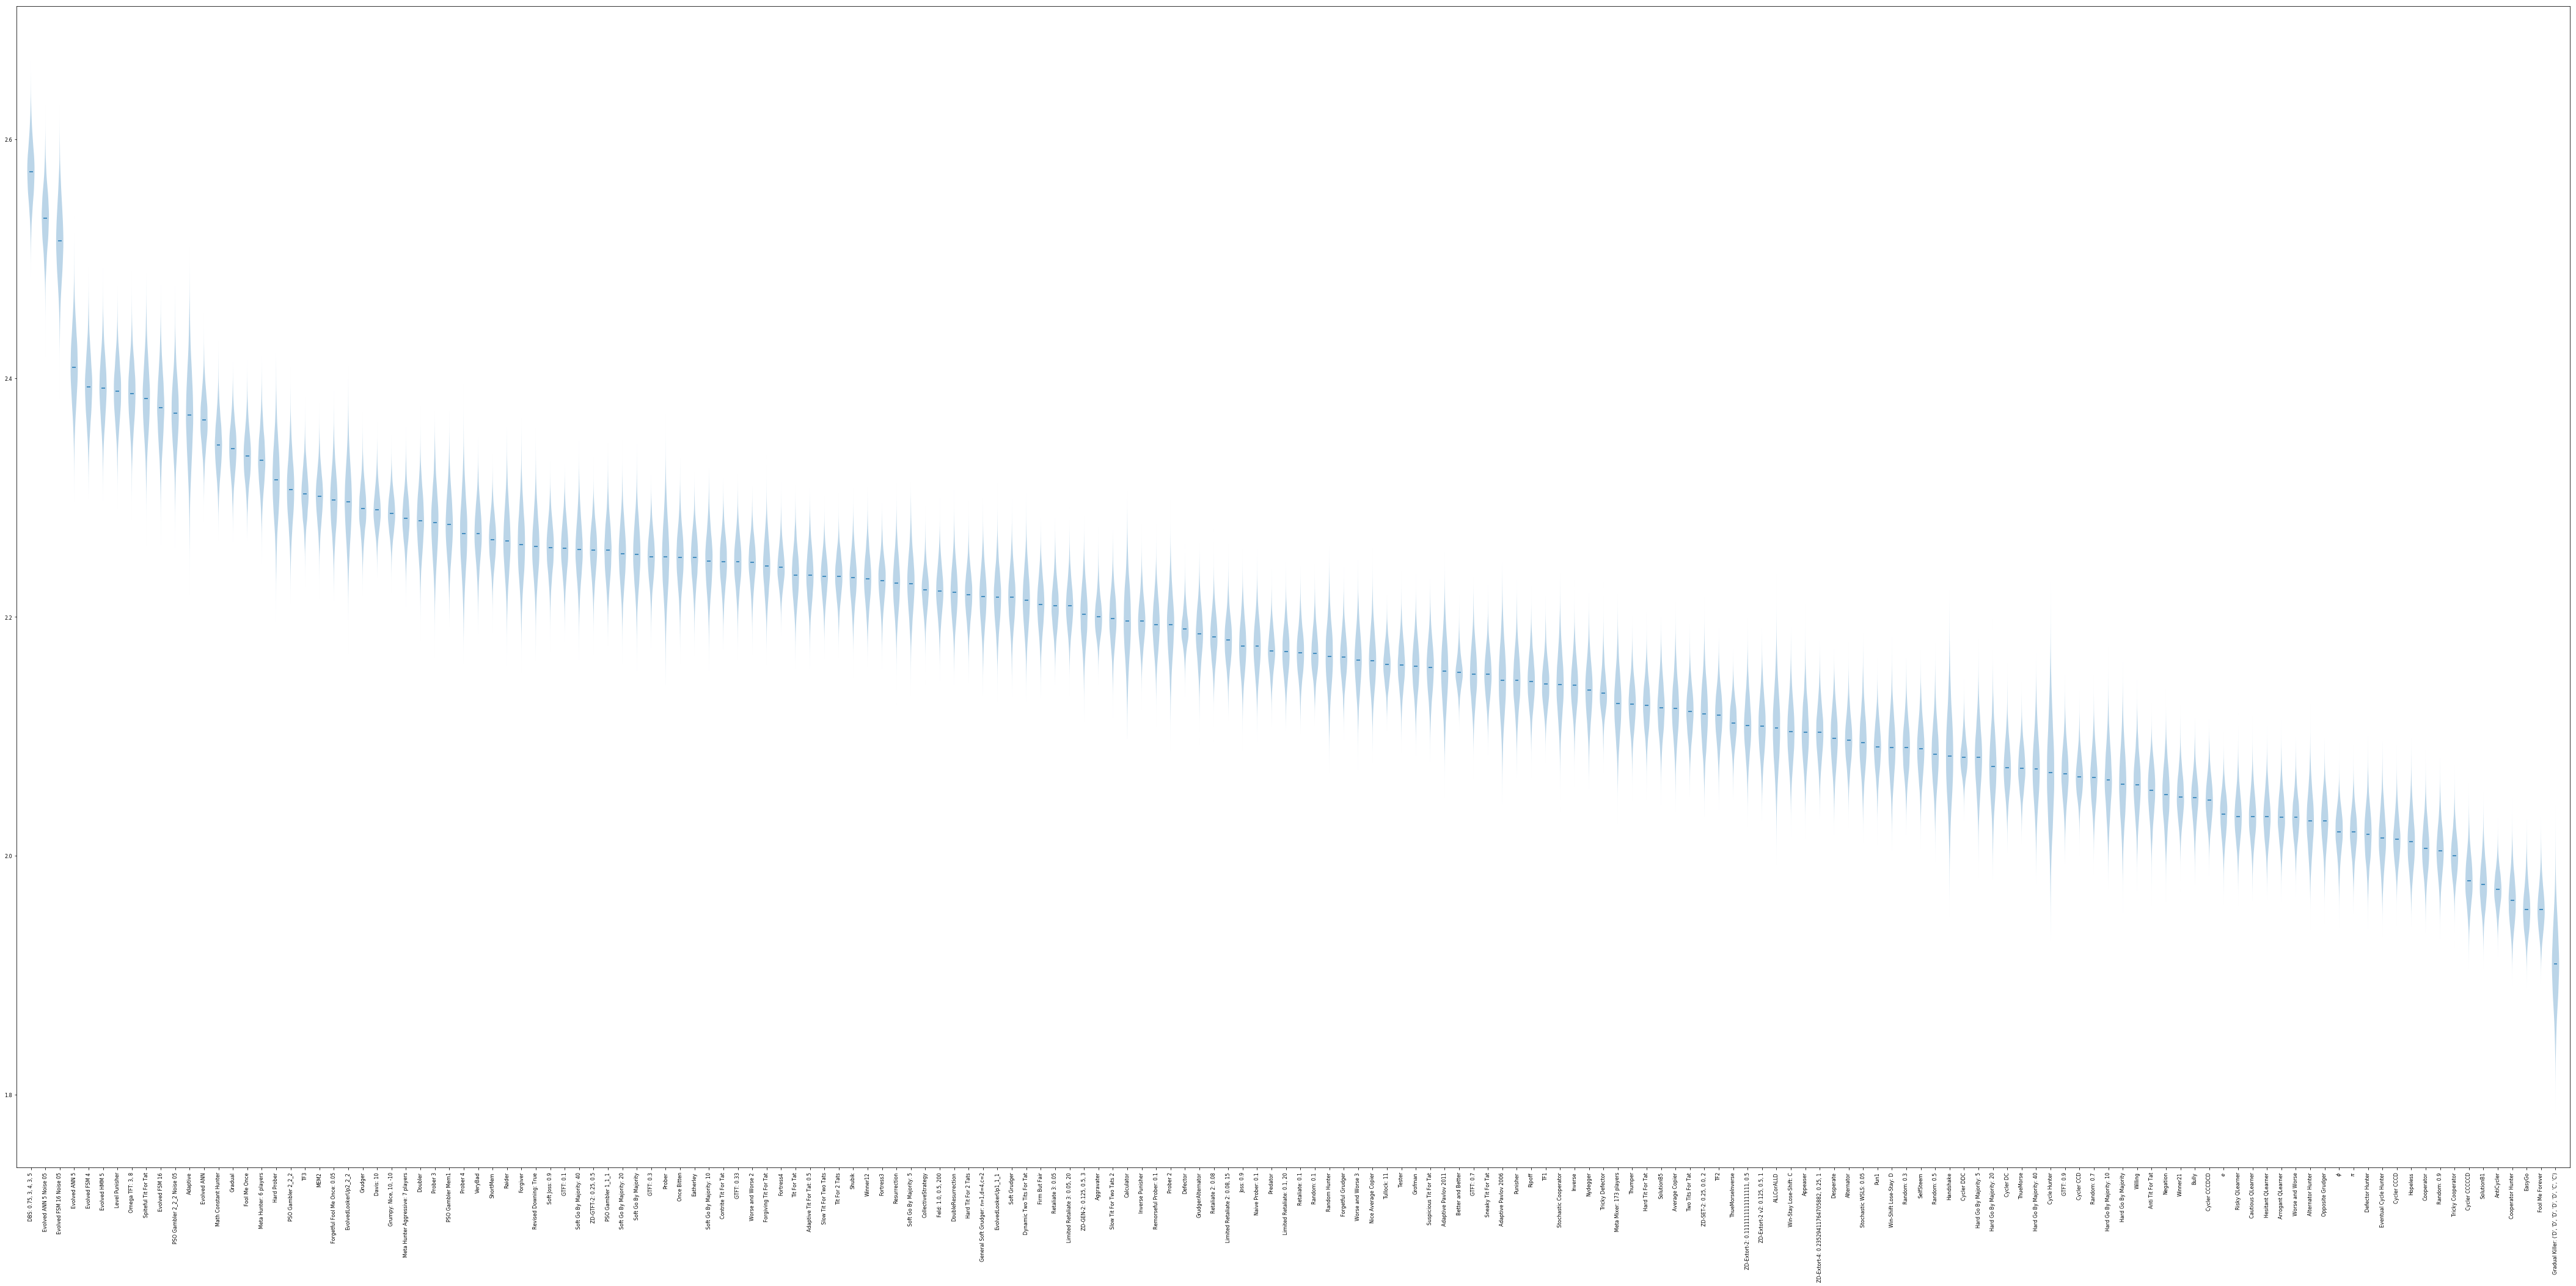

In [19]:
fig, ax = plt.subplots()
width = number_of_players / 3
height = width / 2 
spacing = 4 
positions = spacing * np.arange(1, number_of_players + 1, 1)
fig.set_size_inches(width, height) 

ax.violinplot([scores[player] for player in scores_summary.index],
              positions=positions, widths=spacing / 2,
              showmedians=True, showextrema=False)
ax.set_xticks(positions) 
ax.set_xticklabels(scores_summary.index, rotation=90)
ax.set_xlim([0, spacing * (number_of_players + 1)])
ax.tick_params(axis='both', which='both', labelsize=8)
fig.tight_layout()
fig.savefig("../assets/noisy_scores_boxplots.pdf");

## Ranks

In [20]:
summary_ranks = scores.rank(axis=1, ascending=False).describe(percentiles=[0.05, .25, .5, .75, .95]).transpose()
summary_ranks = summary_ranks.sort_values("mean")
summary_ranks.head(15)

,count,mean,std,min,5%,25%,50%,75%,95%,max
"DBS: 0.75, 3, 4, 3, 5",13000.0,1.205462,0.469036,1.0,1.0,1.0,1.0,1.0,2.0,3.0
Evolved ANN 5 Noise 05,13000.0,2.191654,0.626814,1.0,1.0,2.0,2.0,3.0,3.0,5.0
Evolved FSM 16 Noise 05,13000.0,2.618846,0.628201,1.0,1.0,2.0,3.0,3.0,3.0,9.0
Evolved ANN 5,13000.0,6.374769,2.795923,2.0,4.0,4.0,5.0,8.0,12.0,24.0
Evolved FSM 4,13000.0,7.928038,3.200206,3.0,4.0,5.0,7.0,10.0,14.0,33.0
Evolved HMM 5,13000.0,7.999038,3.123724,3.0,4.0,5.0,7.0,10.0,14.0,24.0
Level Punisher,13000.0,8.293692,3.089165,3.0,4.0,6.0,8.0,10.0,14.0,26.0
"Omega TFT: 3, 8",13000.0,8.568385,3.273694,3.0,4.0,6.0,8.0,11.0,15.0,30.0
Spiteful Tit For Tat,13000.0,9.192577,3.795063,3.0,4.0,6.0,9.0,12.0,16.0,39.0
Evolved FSM 16,13000.0,10.216846,4.099292,3.0,4.0,7.0,10.0,13.0,17.0,42.0


In [21]:
# Write the top 15 players to a tex table
with open("../assets/noisy_top_15_ranks_summary.tex", "w") as f:
    f.write(clean_latex(summary_ranks.head(15).round(2).to_latex()))

## Payoff matrix

In [22]:
payoff_matrix = read_payoff_matrix(files=noisy_files)
payoff_matrix.shape

(176, 176)

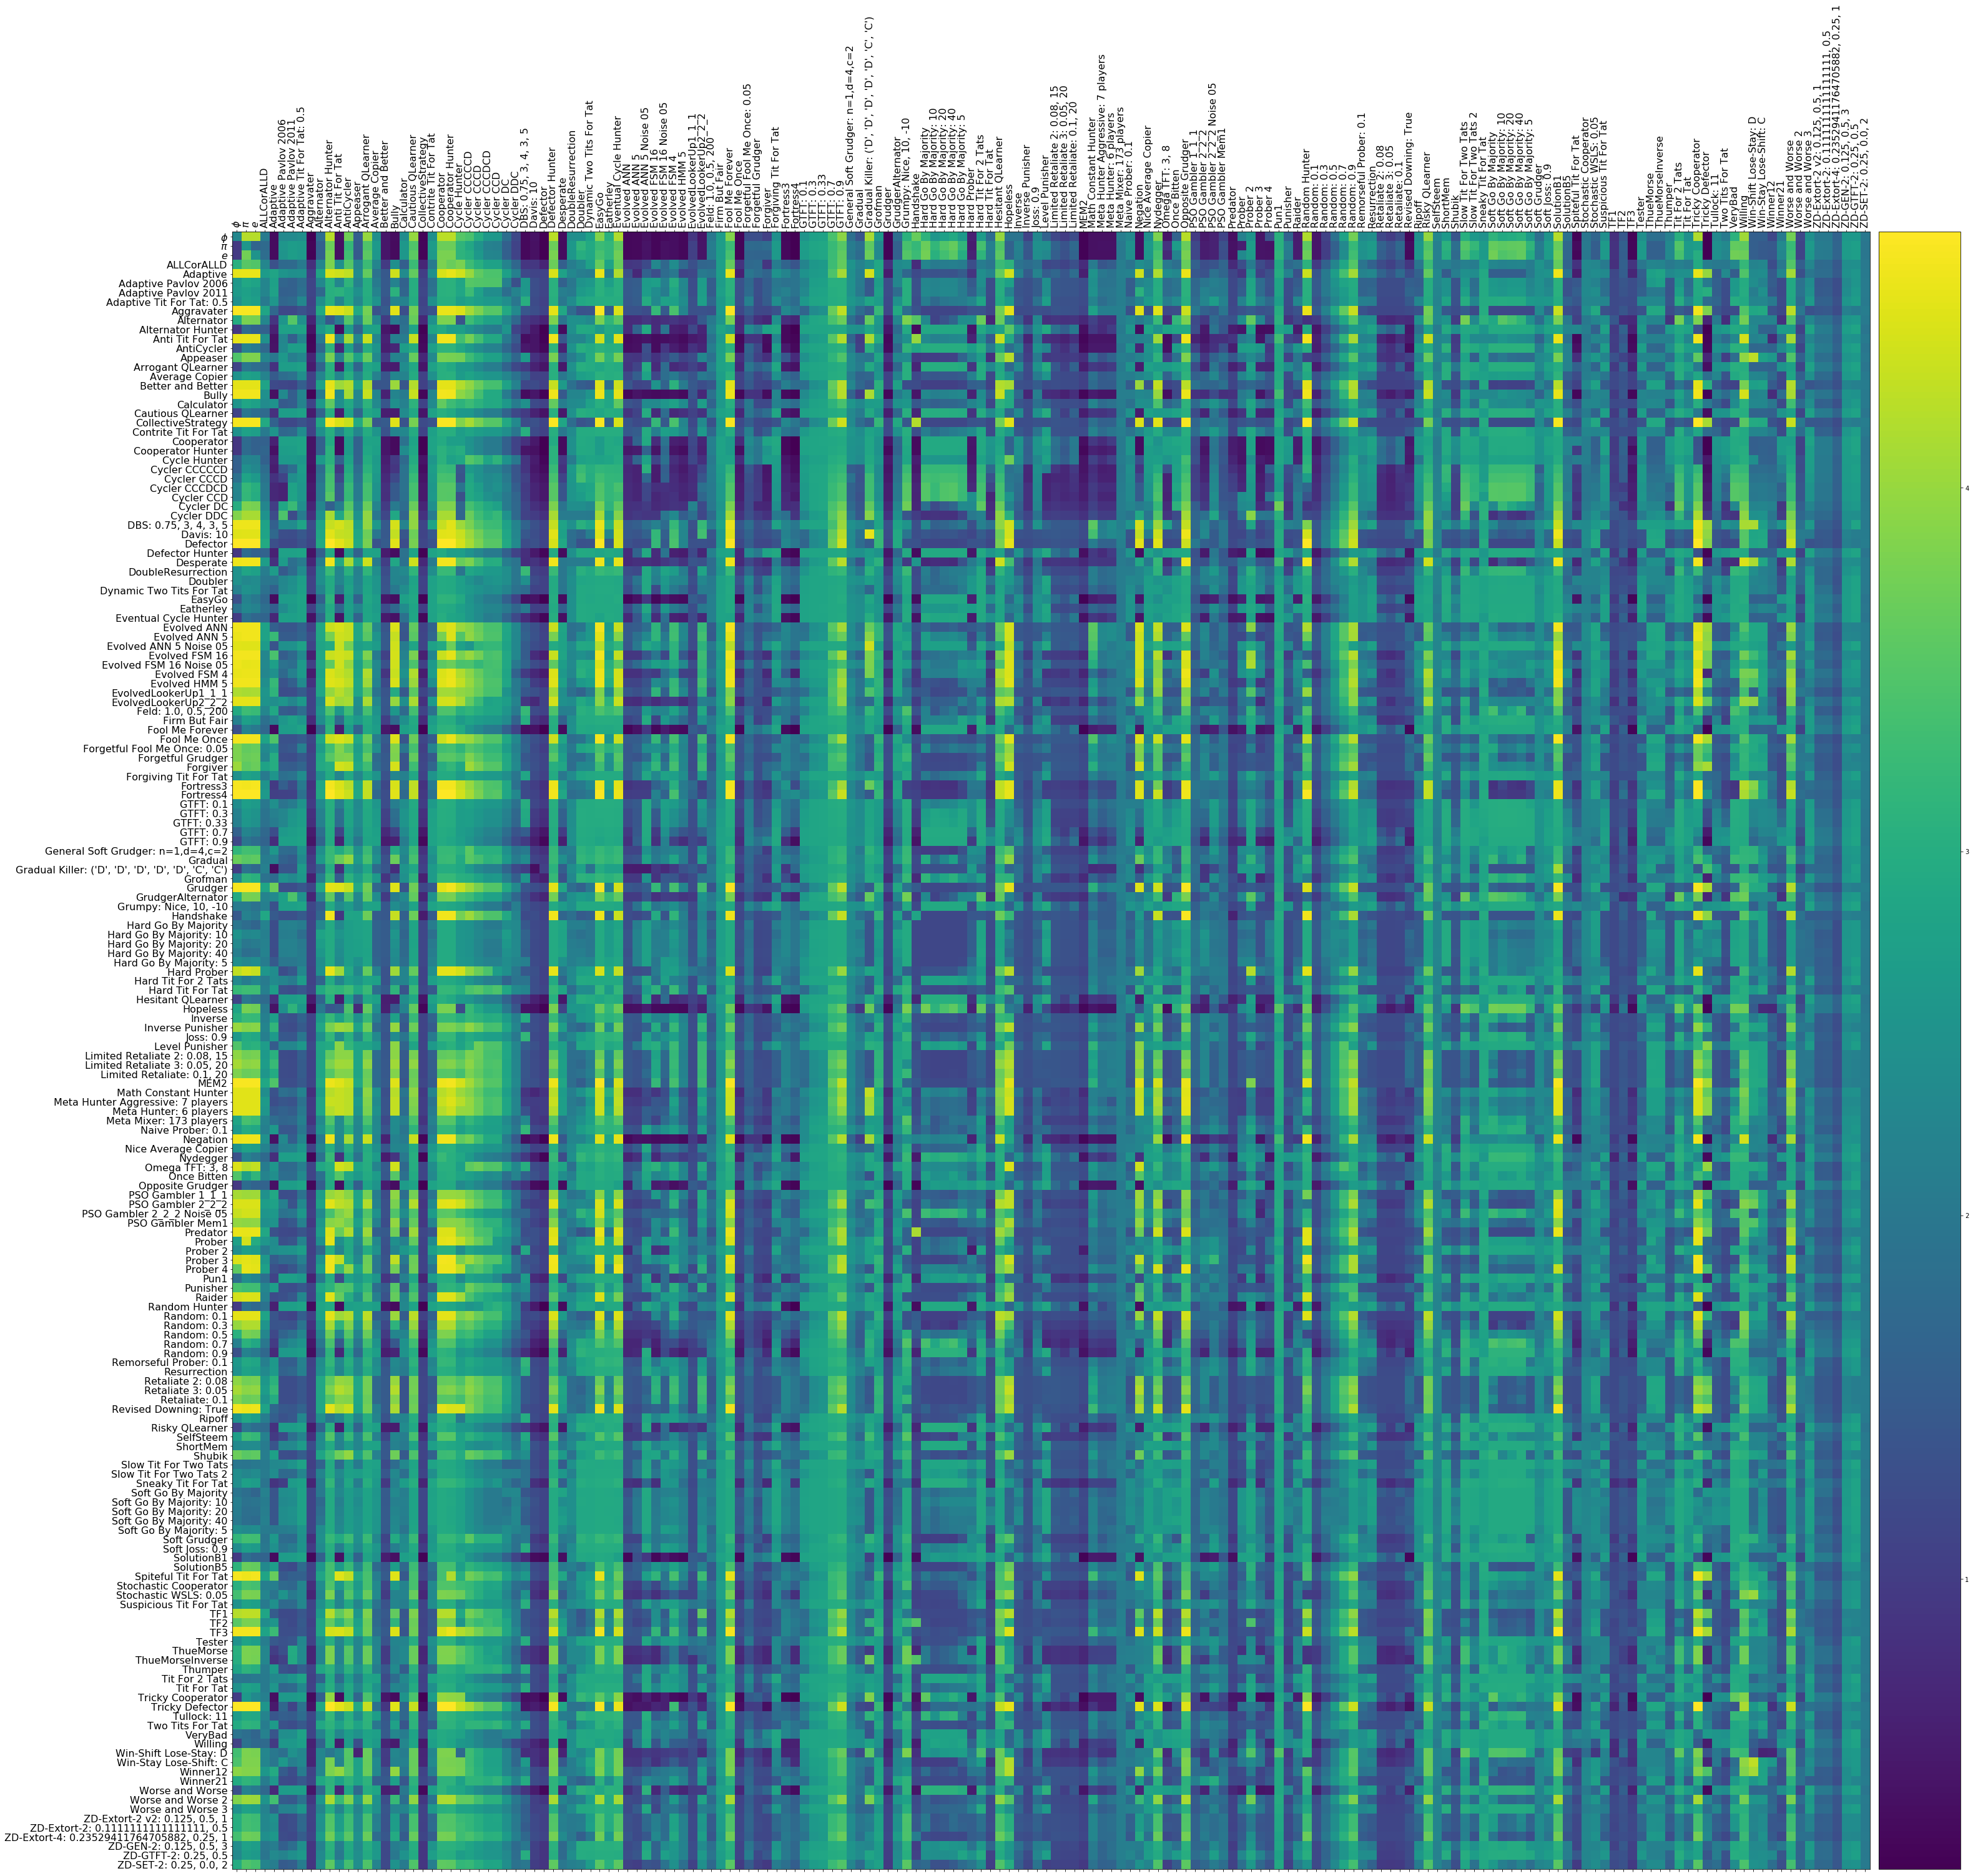

In [23]:
fig, ax = plt.subplots()
width = number_of_players / 4
height = width
spacing = 4 
fig.set_size_inches(width, height) 

mat = ax.matshow(payoff_matrix)

ax.set_xticks(range(number_of_players))
ax.set_yticks(range(number_of_players))
ax.set_xticklabels(player_names, rotation=90)
ax.set_yticklabels(player_names)
ax.tick_params(axis='both', which='both', labelsize=16) 

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
fig.colorbar(mat, cax=cax)

fig.tight_layout()
fig.savefig("../assets/noisy_scores_heatmap.pdf");

## Wins

In [24]:
wins = read_wins(files=noisy_files)
wins.head()

,$\phi$,$\pi$,$e$,ALLCorALLD,Adaptive,Adaptive Pavlov 2006,Adaptive Pavlov 2011,Adaptive Tit For Tat: 0.5,Aggravater,Alternator,...,Winner21,Worse and Worse,Worse and Worse 2,Worse and Worse 3,"ZD-Extort-2 v2: 0.125, 0.5, 1","ZD-Extort-2: 0.1111111111111111, 0.5","ZD-Extort-4: 0.23529411764705882, 0.25, 1","ZD-GEN-2: 0.125, 0.5, 3","ZD-GTFT-2: 0.25, 0.5","ZD-SET-2: 0.25, 0.0, 2"
0,62.0,56.0,54.0,77.0,104.0,132.0,138.0,87.0,157.0,71.0,...,153.0,47.0,110.0,72.0,126.0,119.0,130.0,58.0,56.0,89.0
1,63.0,51.0,57.0,76.0,99.0,142.0,130.0,91.0,159.0,73.0,...,147.0,49.0,105.0,61.0,117.0,119.0,135.0,57.0,55.0,90.0
2,61.0,53.0,54.0,74.0,96.0,138.0,137.0,84.0,160.0,76.0,...,154.0,45.0,107.0,65.0,121.0,107.0,128.0,52.0,55.0,89.0
3,60.0,50.0,58.0,81.0,97.0,136.0,142.0,89.0,155.0,79.0,...,151.0,44.0,101.0,69.0,116.0,113.0,136.0,59.0,57.0,87.0
4,65.0,50.0,53.0,79.0,101.0,139.0,140.0,88.0,158.0,71.0,...,158.0,46.0,103.0,65.0,119.0,117.0,138.0,65.0,59.0,94.0


In [25]:
wins_summary = wins.describe(percentiles=[0.05, .25, .5, .75, .95]).transpose()
wins_summary = wins_summary.sort_values("50%", ascending=False)  # Sorted on the median
wins_summary.loc[scores_summary.head(15).index]

,count,mean,std,min,5%,25%,50%,75%,95%,max
"DBS: 0.75, 3, 4, 3, 5",13000.0,102.531692,3.706094,87.0,97.00,100.0,102.0,105.0,109.0,118.0
Evolved ANN 5 Noise 05,13000.0,75.055692,4.223975,59.0,68.00,72.0,75.0,78.0,82.0,93.0
Evolved FSM 16 Noise 05,13000.0,88.759923,3.877318,75.0,82.00,86.0,89.0,91.0,95.0,104.0
Evolved ANN 5,13000.0,137.832923,4.399357,118.0,131.00,135.0,138.0,141.0,145.0,154.0
Evolved FSM 4,13000.0,74.201308,2.697855,64.0,70.00,72.0,74.0,76.0,79.0,84.0
Evolved HMM 5,13000.0,88.225385,2.770439,78.0,84.00,86.0,88.0,90.0,93.0,99.0
Level Punisher,13000.0,94.246154,4.727193,77.0,86.95,91.0,94.0,97.0,102.0,112.0
"Omega TFT: 3, 8",13000.0,131.676615,4.299311,112.0,125.00,129.0,132.0,135.0,139.0,148.0
Spiteful Tit For Tat,13000.0,155.082692,3.328076,142.0,150.00,153.0,155.0,157.0,161.0,167.0
Evolved FSM 16,13000.0,103.271000,3.637576,89.0,97.00,101.0,103.0,106.0,109.0,118.0


In [26]:
# Write the top 15 players to a tex table
with open("../assets/noisy_top_15_wins_summary.tex", "w") as f:
    f.write(clean_latex(wins_summary.loc[scores_summary.head(15).index].round(2).to_latex()))